In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture as mix
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import svm
import copy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("magic04.data")
df.columns = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df.loc[df['class'] == 'g','class'] = 0 #gamma - signal
df.loc[df['class'] == 'h','class'] = 1 #hadron - background

In [3]:
#supervised learning
ID = 1204565
cdf = copy.deepcopy(df.dropna(0, how='any'))
X = cdf.drop('class',axis=1)
Y = cdf['class']
m = X.shape[0]
m_training = (int)(m/2)
m_test = m-m_training
permutation = np.random.permutation(m)
X = X.loc[permutation,:]
Y = Y[permutation]
X_train = X[0:m_training]
Y_train = Y[0:m_training]
X_test = X[m_training:]
Y_test = Y[m_training:]

In [8]:
#in the following lines we use 
# 1) Neural Network
# 2) SVM
# 3) Random Forest
mlp = MLPClassifier(max_iter=1000, alpha=1e-4, hidden_layer_sizes=(250,250),activation='relu',
                    solver='adam', tol=1e-4, random_state=ID,
                    learning_rate='adaptive')
mlp.fit(X_train, Y_train)
mlp.score(X_test,Y_test)

0.7749737118822292

In [4]:
rfc = RandomForestClassifier(n_estimators=119,random_state=ID)
rfc.fit(X_train, Y_train)
rfc.score(X_test, Y_test)

0.87465825446898

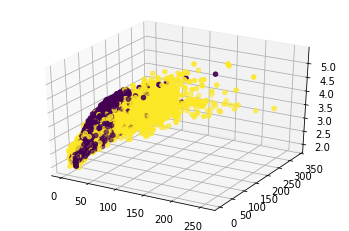

In [5]:
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.loc[:,'fWidth'], X.loc[:,'fLength'],X.loc[:,'fSize'],c=Y)
plt.show()